
## 1. Principal Component Analysis (PCA)

We are now going to perform PCA on the foodprices.xlsx dataset that contains the prices of 5 types of food items in different cities in the year 1973. 

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import style
from matplotlib import pyplot as plt
#import graphviz as gr
%matplotlib inline
style.use("fivethirtyeight")
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 60)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)

Mounted at /content/drive


In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df=pd.read_excel('/content/drive/MyDrive/foodprices.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       24 non-null     object 
 1   Bread      24 non-null     float64
 2   Hamburger  24 non-null     float64
 3   Butter     24 non-null     float64
 4   Apples     24 non-null     float64
 5   Tomatoes   24 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.2+ KB


We loaded the data into a dataframe df that and we see that it contains 5 variables that are considered as target variables. 

We then check the variables for correlation

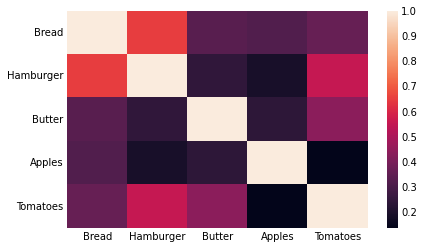

In [ ]:
#see the corr matrix
cm=df.corr()
sns.heatmap(cm)

We see that the data is correlated and thereby running a PCA model on our data would help reduce the collinearity. 


1.1 Creating the PCA model and Identifying PC1 and PC2

In [ ]:
#lets separate the x and y variables
x=df.drop("City",axis=1)
y=df["City"]

In [ ]:
#STEP 1: We will normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_x=scaler.fit_transform(x)

In [ ]:
#step 2: get the PCA model
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# Now we can transform this data to its first 2 principal components.

scaled_x_pca = pca.fit_transform(scaled_x)
scaled_x_pca=pd.DataFrame(scaled_x_pca,columns=["PC1","PC2"])
scaled_x_pca


,PC1,PC2
0,0.993395,-0.064096
1,0.121500,0.023234
2,0.165293,0.335932
3,0.056279,0.444786
4,-0.753077,0.223373
5,0.234050,-0.348944
6,0.027142,0.233184
7,-0.199919,-0.079058
8,0.168949,-0.282949
9,-0.108775,0.426234


We now have two Principal Components PC1 and PC2 as given in the above table.

1.2 Create Eigenvalues and loadings

In [ ]:
###eigen values
eigenvalues = pca.explained_variance_

###loadings
import numpy as np
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
print(eigenvalues)
print(loadings)

[0.13697926 0.07053865]
[[ 0.14324042  0.00395698]
 [ 0.17174253  0.06421496]
 [ 0.15059519  0.01839982]
 [ 0.1586453  -0.23101448]
 [ 0.19778449  0.11266403]]


The eigen values show that PC1 explains 0.13/0.20 and PC2 explains 0.07/0.20 of variation. 

1.3 Explaination of variance in data

In [ ]:
#Finding the variation of the data.
pca.explained_variance_ratio_

array([0.46526145, 0.23959038])

We see that PC1 contributes 47% and PC2 contributes to 24% of variance in the data.

1.4 Generating Graph to show how the food prices given by PC1 and PC2 for different cities

         PC1       PC2           City  Bread  Hamburger  Butter  Apples  Tomatoes
0   0.993395 -0.064096      Anchorage   70.9      135.6  155.00    63.9     100.1
1   0.121500  0.023234        Atlanta   36.4      111.5  144.30    53.9      95.9
2   0.165293  0.335932      Baltimore   28.9      108.8  151.00    47.5     104.5
3   0.056279  0.444786         Boston   43.2      119.3  142.00    41.1      96.5
4  -0.753077  0.223373        Buffalo   34.5      109.9  124.80    35.6      75.9
5   0.234050 -0.348944        Chicago   37.1      107.5  145.40    65.1      94.2
6   0.027142  0.233184     Cincinnati   37.1      118.1  149.60    45.6      90.8
7  -0.199919 -0.079058      Cleveland   38.5      107.7  142.70    50.3      83.2
8   0.168949 -0.282949         Dallas   35.5      116.8  142.50    62.4      90.7
9  -0.108775  0.426234        Detroit   40.8      108.8  140.10    39.7      96.1
10  0.667573 -0.215100       Honolulu   50.9      131.7  154.40    65.0      93.9
11 -0.046132 -0.

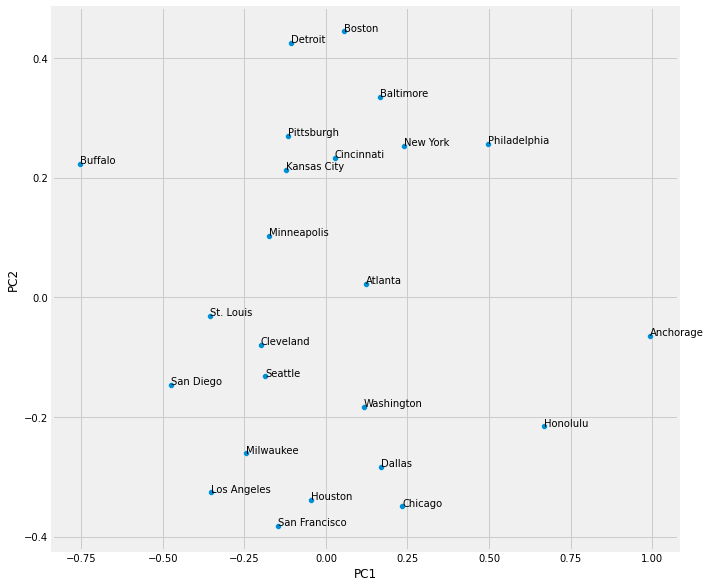

In [ ]:
total_set=pd.concat([scaled_x_pca,df],axis=1)
print(total_set)
plt.figure(figsize=(10,10))
sns.scatterplot(x="PC1",y="PC2",data=total_set)
for i in range(len(total_set)):
    plt.text(total_set.loc[i,"PC1"],total_set.loc[i,"PC2"],total_set.loc[i,"City"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

The above plot shows the performance or values of PC1 and PC2 that are the prices of different food items in different Cities. 

## 2. Common goal of Principal Component Analysis and Confirmator Factor Analysis and how each differs?

Confirmatory factor analysis (CFA) is a statistical technique used to verify the factor structure of a set of observed
variables. Principal Component Analysis is a variable reduction procedure – it allows you summarize the common variation in many variables into just a few. It’s similar to Factor Analysis, but has different underlying assumptions.
They're both common methods used to analyze
groups of variables for the purpose of reducing them into subsets represented by latent constructs
1. PCA has as a goal to define new variables based on the highest variance 
2. FA has as a goal to define new variables that we can understand and interpret in a business / practical manner.
3. Resulting from this mathematical difference, we have also a big difference between the application of PCA and Factor Analysis. 
4. In PCA, there is one fixed outcome that orders the components from the highest explanatory value to the lowest explanatory value.
5. In Factor Analysis, we can apply rotations to our solution, which will allow for finding a solution that has a more coherent business explication to each of the factors that were identified.
6. PCA on the other hand is used in cases where we want to retain the largest amount of variation in the smallest number of variables possible. 7. PCA is also much used in data preparation for Machine Learning tasks, where we want to help the Machine Learning model by already “summarizing” the data in an easier-to-digest form.


## 3. Difference between Linear Discriminant Analysis(LDA) and Principal Component Analysis(PCA) in dimensionality reduction

LDA and PCA are linear transformation techniques: LDA is supervised whereas PCA is unsupervised – PCA ignores class labels.
LDA focuses on finding a feature subspace that maximizes the separability between the groups. While Principal component analysis is an unsupervised Dimensionality reduction technique, it ignores the class label. PCA focuses on capturing the direction of maximum variation in the data set.
